In [1]:
import rosbag
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from tf_bag import BagTfTransformer

sns.set_theme(style="whitegrid")

directions = [1, 2]
approaches = ['teb', 'rl']

end_positions = {
    1: (-4.2, -4.8),
    2: (-1.35, -1.55)
}
df_list = []
for direction in directions:
    for approach in approaches:
        for i in range(15):
            folder = 'd{}_{}'.format(direction, i + 1)
            print('processing: {}'.format(folder))
            try:
                bag = rosbag.Bag('/home/dschori/Documents/new_rosbags/{}/{}/data_0.bag'.format(approach, folder))

                bag_transformer = BagTfTransformer(
                    '/home/dschori/Documents/new_rosbags/{}/{}/data_0.bag'.format(approach, folder))
            except rosbag.bag.ROSBagUnindexedException:
                continue

            x_s, y_s = [], []

            for topic, msg, t in bag.read_messages(topics=['/tf']):
                try:
                    translation, quaternion = bag_transformer.lookupTransform('map', 'base_link', t)
                    x_s.append(translation[0])
                    y_s.append(translation[1])
                except:
                    pass
            starting_point = (x_s[0], y_s[0])
            ending_point = (x_s[-1], y_s[-1])
            df_list.append(
                {
                    'Approach': approach,
                    'Direction': direction,
                    'Target Position': end_positions[direction],
                    'Actual Position': ending_point,
                    'Distance to Target': math.dist(ending_point, end_positions[direction])
                }
            )
            bag.close()

data = pd.DataFrame(df_list)

processing: d1_1
0.06740046314154763
processing: d1_2
0.044085319362123246
processing: d1_3
0.03846161928837865
processing: d1_4
0.052683672239332555
processing: d1_5
0.030372594769266046
processing: d1_6
0.08959836163977558
processing: d1_7
0.057737673661368796
processing: d1_8
0.05645236276398102
processing: d1_9
0.04998119630753294
processing: d1_10
0.07786261276812353
processing: d1_11
0.07619895460334879
processing: d1_12
0.047195931894373655
processing: d1_13
0.06458933971589557
processing: d1_14
0.06335130971872661
processing: d1_15
0.06413993000877843
processing: d1_1
3.940239896775279
processing: d1_2
3.804362256502689
processing: d1_3
1.5331875622173168
processing: d1_4
0.5942925257085382
processing: d1_5
1.1027505049779738
processing: d1_6
1.2956080345674805
processing: d1_7
3.132756918392671
processing: d1_8
1.300822437992795
processing: d1_9
1.0488155967471946
processing: d1_10
0.6265240671118167
processing: d1_11
1.1676729708593097
processing: d1_12
1.1992521780975944
pro

/opt/ros/noetic/lib/python3/dist-packages/tf/listener.py:63: UserWarning: translation should be of type Vector3
  self._buffer.set_transform(transform, authority)
/opt/ros/noetic/lib/python3/dist-packages/tf/listener.py:63: UserWarning: rotation should be of type Quaternion
  self._buffer.set_transform(transform, authority)
/home/dschori/PycharmProjects/MasterThesis/ackerbot_sim_ws/src/rl-scouting/scouting_train/scripts/tf_bag.py:99: UserWarning: translation should be of type Vector3
  self.transformer._buffer.set_transform_static(st_tfm, "default_authority")
/home/dschori/PycharmProjects/MasterThesis/ackerbot_sim_ws/src/rl-scouting/scouting_train/scripts/tf_bag.py:99: UserWarning: rotation should be of type Quaternion
  self.transformer._buffer.set_transform_static(st_tfm, "default_authority")


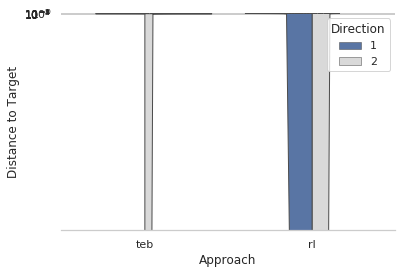

In [11]:
ax = sns.violinplot(data=data, x="Approach", y="Distance to Target", hue='Direction',
               split=True, inner="quart", linewidth=1,
               palette={1: "b", 2: ".85"})
ax.set(ylim=(-3., 3.))
sns.despine(left=True)

plt.show()

/home/dschori/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


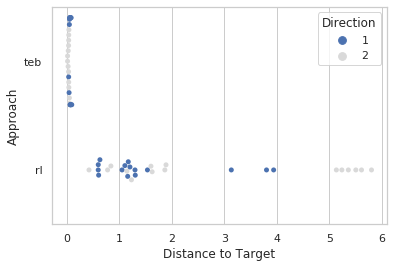

In [10]:
plt.yscale('log')
ax = sns.swarmplot(data=data, x="Distance to Target", y="Approach", hue="Direction",
               palette={1: "b", 2: ".85"})

In [15]:
import numpy as np
log_data = [np.log10(d) for d in data['Distance to Target']]

In [17]:
data['Distance to Target'] = log_data

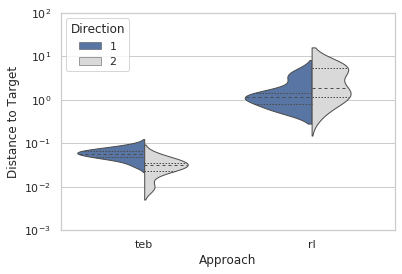

In [40]:
from matplotlib import ticker as mticker
ax = sns.violinplot(data=data, x="Approach", y="Distance to Target", hue='Direction',
               split=True, inner="quart", linewidth=1,
               palette={1: "b", 2: ".85"})
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.yaxis.set_ticks([np.log10(x) for p in range(-6,1) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
ax.set(ylim=(-3, 2))
plt.show()